### Importamos librerias

In [40]:
# Instalar librerías desde pip (solo necesitas hacerlo una vez)
#!pip install nltk
#!pip install vaderSentiment
#!pip install textblob
#!python -m textblob.download_corpora

# Descargar recursos necesarios para procesamiento de texto (solo necesitas hacerlo una vez)
import nltk
#nltk.download('punkt')         # Tokenización de frases/palabras
#nltk.download('stopwords')     # Lista de palabras vacías (como "el", "la", "y", etc.)

# Manejo de datos
import pandas as pd           # Para cargar, explorar y transformar datasets
import numpy as np            # Funciones matemáticas y manejo de arrays

# Visualización
import matplotlib.pyplot as plt  # Para crear gráficas
import seaborn as sns            # Visualización más elegante sobre matplotlib

# Procesamiento de lenguaje natural (NLP)
import nltk                                 # Toolkit general para NLP
from nltk.corpus import stopwords           # Palabras vacías comunes (ej. "de", "el", "y")
from nltk.tokenize import word_tokenize     # Separar texto en palabras
import re                                   # Expresiones regulares para limpiar texto

# Análisis de sentimiento
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # Modelo basado en reglas
from textblob import TextBlob               # Modelo basado en léxico para análisis de sentimientos

### Importamos dataset Amazon

In [70]:
df = pd.read_csv('/Users/hacanaval/MEGA/MEGAsync/Academico/No Country/Simulación proyecto express/amazon_data/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Limpieza del dataset

In [43]:
# 1. Eliminar columnas irrelevantes (opcional)
df_clean = df.drop(columns=[
    'img_link', 'product_link', 'user_id', 'user_name', 'review_id',
    'discounted_price', 'actual_price', 'discount_percentage',
    'rating_count', 'about_product'
])

# 2. Combinar título y contenido en una sola columna (por si están separados)
df_clean['full_review'] = df_clean['review_title'].fillna('') + ' ' + df_clean['review_content'].fillna('')

# 3. Función de limpieza de texto
def clean_text(text):
    text = re.sub(r"http\S+", "", text)                 # Quitar URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)             # Quitar símbolos y números
    text = text.lower()                                 # Convertir a minúsculas
    text = text.strip()                                 # Eliminar espacios al inicio/fin
    return text

# 4. Aplicar la limpieza
df_clean['clean_review'] = df_clean['full_review'].apply(clean_text)

# Vista previa
df_clean[['product_name', 'clean_review']].head()


,product_name,clean_review
0,Wayona Nylon Braided USB to Lightning Fast Cha...,satisfiedcharging is really fastvalue for mone...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,a good braided cable for your type c devicegoo...
2,Sounce Fast Phone Charging Cable & Data Sync U...,good speed for earlier versionsgood productwor...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,good productgood onenicereally nice productver...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,as good as originaldecentgood one for secondar...


### Análisis de sentimiento con VADER y TextBlob

In [46]:
# Inicializar VADER
vader_analyzer = SentimentIntensityAnalyzer()

# Función para aplicar VADER
def vader_sentiment(text):
    score = vader_analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positivo'
    elif score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

# Función para aplicar TextBlob
def textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'Positivo'
    elif score < 0:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicar ambos modelos a la columna 'clean_review'
df_clean['sentimiento_vader'] = df_clean['clean_review'].apply(vader_sentiment)
df_clean['sentimiento_textblob'] = df_clean['clean_review'].apply(textblob_sentiment)

# Ver resultado comparativo
df_clean[['clean_review', 'sentimiento_vader', 'sentimiento_textblob']].head(10)


,clean_review,sentimiento_vader,sentimiento_textblob
0,satisfiedcharging is really fastvalue for mone...,Positivo,Positivo
1,a good braided cable for your type c devicegoo...,Positivo,Positivo
2,good speed for earlier versionsgood productwor...,Positivo,Positivo
3,good productgood onenicereally nice productver...,Positivo,Positivo
4,as good as originaldecentgood one for secondar...,Positivo,Positivo
5,its pretty goodaverage qualityvery good and us...,Positivo,Positivo
6,long durablegooddoes not charge lenovo m tabbe...,Positivo,Positivo
7,worth for money suitable for android autogood...,Positivo,Positivo
8,works on linux for me get the model with anten...,Positivo,Positivo
9,a good braided cable for your type c devicegoo...,Positivo,Positivo


## Visualización y comparación de resultados

### Conteo de clasificaciones por modelo

In [60]:
# Conteo de sentimientos según cada modelo
vader_counts = df_clean['sentimiento_vader'].value_counts()
textblob_counts = df_clean['sentimiento_textblob'].value_counts()

print("Distribución de sentimientos - VADER:")
print(vader_counts)

print("\nDistribución de sentimientos - TextBlob:")
print(textblob_counts)


Distribución de sentimientos - VADER:
sentimiento_vader
Positivo    1413
Negativo      49
Neutral        3
Name: count, dtype: int64

Distribución de sentimientos - TextBlob:
sentimiento_textblob
Positivo    1446
Negativo      19
Name: count, dtype: int64


### Gráfico comparativo de ambos modelos

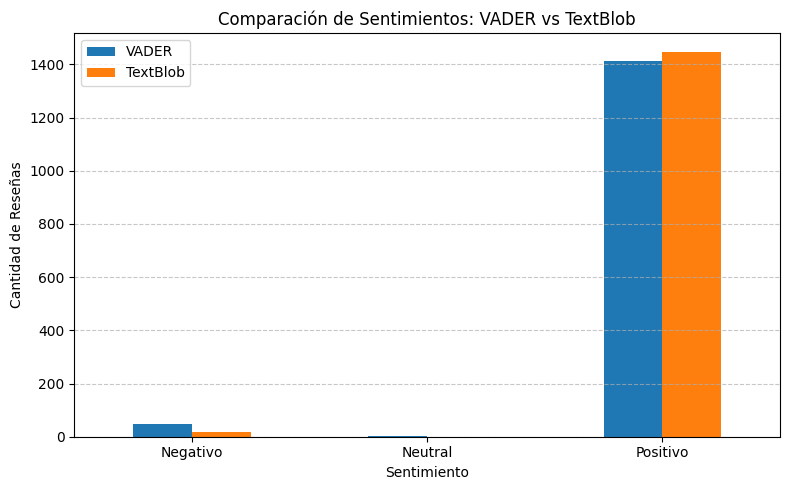

In [63]:
# Unir los conteos en un DataFrame
comparacion_df = pd.DataFrame({
    'VADER': vader_counts,
    'TextBlob': textblob_counts
}).fillna(0)

# Gráfico de barras comparativo
comparacion_df.plot(kind='bar', figsize=(8, 5))
plt.title('Comparación de Sentimientos: VADER vs TextBlob')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### ¿Cuántas veces no coincidieron?

In [66]:
diferencias = df_clean[df_clean['sentimiento_vader'] != df_clean['sentimiento_textblob']]
print(f"Reseñas con diferencia entre VADER y TextBlob: {len(diferencias)} de {len(df_clean)} totales")


Reseñas con diferencia entre VADER y TextBlob: 51 de 1465 totales
